<h1> Lecture 24A

Data Science 8, Summer 2021 </h1>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

<h2> Central Limit Theorem </h2>

In [2]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 301, 10)
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


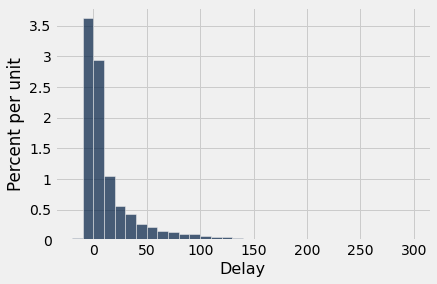

In [3]:
united.hist('Delay', bins=united_bins)

Compute the Median, Mean, and Standard Deviation of the Delays

In [4]:
delays = united.column('Delay')
delay_median = percentile(50, delays)
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
print('Median Delay:', np.round(delay_median,2))
print('Mean Delay:', np.round(delay_mean,2))
print('Delay Standard Deviation:', np.round(delay_sd,2))

Median Delay: 2
Mean Delay: 16.66
Delay Standard Deviation: 39.48


Assume that we don't have practical access to the complete data. We'll only sample the data. 

Let's generate a sample of flights and find the mean delay in that sample (which we'll call the sample mean). The Sample Mean is an estimate of the population mean (i.e., true mean flight delay of all flights).

In [5]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    # Recall that the "sample" method without an 
    # argument performs the sampling with replacement
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

Run the function `one_sample_mean` several times:

In [6]:
one_sample_mean(400)

16.3825

Slides: Distribution of sample mean

<h3>Question: How many possible random samples are there?</h3>

<h4>In how many possible ways can we draw a sample of size <tt>sample_size=100</tt> from the data set?
</h4>

Total number of flights in our data set (total population size):

In [7]:
united.num_rows

13825

For each flight we draw, we have 100 possibilities (recall that we sample with replacement):

In [8]:
# How many possible sample means are there?
united.num_rows ** 100

1165504615418237494349615885011805820520566729506417030256012982835521101389289581506235141816629947536725096544602733133107053753073943300297773225614255185451716371701575964369001765160460588336757167411656514145375086808526538359315710549541088092844181050829772823311457655911418600856861473091769868254342788739800237506723607294430619482503424038624026101052634369335293806901887592175626195967197418212890625

<h4>How many random samples can we get of size <tt>sample_size=400</tt>?</h4>

In [9]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

Far too many samples to enumerate them all!  So while there *is* a well-defined distribution given by all possible sample means from all samples, it is too hard to compute it exactly.  Instead, we approximate this distribution by drawing 10,000 samples from it (which is much smaller than the ridiculous number above!).  We then draw the histogram of the sample means of those 10,000 samples.

In particular, to understand the variability of the Sample Mean, let's
1. run a large number of trials; that is, take a large number of samples of identical size (e.g., sample_size=400)
2. compute the mean of each sample (called the "Sample Mean")
3. observe the distribution of these sample means.

Run a large number of trials and compute the mean of each sample

In [10]:
def many_sample_means(sample_size,num_simulations):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(num_simulations):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Let's look at a sample size = 100 with 10000 replications

In [11]:
sample_means_100_10000 = many_sample_means(100,10000)

In [12]:
sample_means_100_10000

array([13.1 , 18.85, 19.92, ..., 18.57, 11.4 , 23.01])

In [13]:
len(sample_means_100_10000)

10000

Population Mean: 16.66
Sample Mean: 16.69


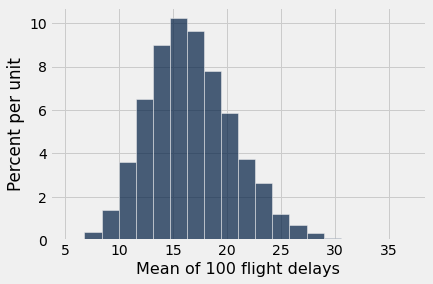

In [14]:
sample_means_100_10000_table = Table().with_column(
    'Mean of 100 flight delays', sample_means_100_10000)

sample_means_100_10000_table.hist(bins=20)

print('Population Mean:', np.round(delay_mean,2))
print('Sample Mean:', np.round(np.mean(sample_means_100_10000),2))

<h3>Now let's look at the distribution's dependence on sample size.</h3>
    
What if each sample population contains 400 flights?

Population Average: 16.66
Sample Mean: 16.64


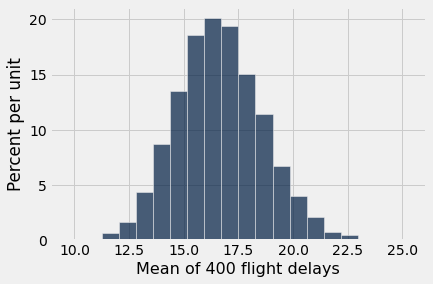

In [15]:
sample_means_400_10000 = many_sample_means(400,10000)
sample_means_400_10000_table = Table().with_column(
    'Mean of 400 flight delays', sample_means_400_10000)

sample_means_400_10000_table.hist(bins=20)
print('Population Average:', np.round(delay_mean,2))
print('Sample Mean:', np.round(np.mean(sample_means_400_10000),2))

Now do the same with a sample size of 900 flights.

Population Average: 16.66
Sample Mean: 16.66


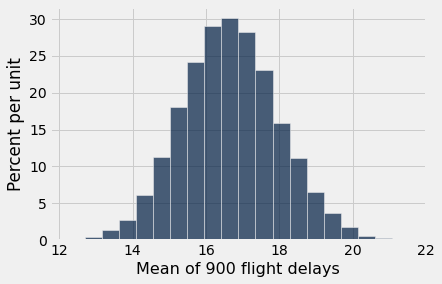

In [16]:
sample_means_900_10000 = many_sample_means(900,10000)
sample_means_900_10000_table = Table().with_column(
    'Mean of 900 flight delays', sample_means_900_10000).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Mean:', np.round(np.mean(sample_means_900_10000),2))

In [17]:
sample_means_100_400_900_table = Table().with_columns(
    'Mean of 100 flight delays', sample_means_100_10000,
    'Mean of 400 flight delays', sample_means_400_10000)#,
    #'Mean of 900 flight delays', sample_means_900_10000)
sample_means_100_400_900_table

Mean of 100 flight delays,Mean of 400 flight delays
13.1,16.2625
18.85,18.635
19.92,18.635
11.69,19.655
17.64,18.18
18.33,13.2225
15.88,18.215
12.43,15.4075
18.52,15.3025
12.66,18.44


<h4>For comparison, superimpose the histograms for sample sizes 100, 400, and 900:</h4>

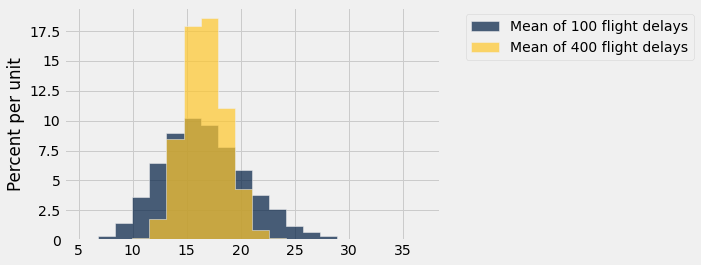

In [18]:
sample_means_100_400_900_table.hist(bins=20)

Let's interpret the picture above?
Think in terms of "center of mass" and spread.
Where is our mean?
What does this tell you about the effect of increasing the sample size?

Slides: specifying distribution

<h3>Quantifying the effect of sample size on spread:</h3>

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.691853
Population SD: 39.480199851609314
SD of sample means: 3.9709313537747035


Text(0.5, 1.0, 'Sample Size 100')

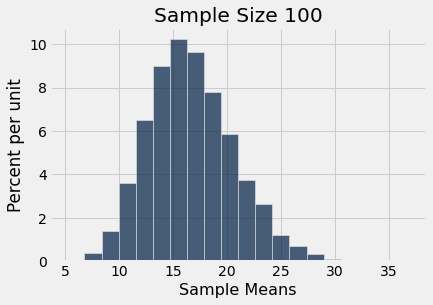

In [19]:
sample_size = 100
print("Sample size: ", sample_size)
print("Population mean:", delay_mean)
print("Average of sample means: ", np.mean(sample_means_100_10000))
print("Population SD:", delay_sd)
print("SD of sample means:", np.std(sample_means_100_10000))

# Plot a histogram of the sample means
sample_means_100_10000_table.hist(bins=20)
plots.xlabel('Sample Means')
plots.title('Sample Size ' + str(sample_size))

In [20]:
39.480199851609314/3.978256500345849

9.923995561416692

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.6423065
Population SD: 39.480199851609314
SD of sample means: 1.9776872683282738


Text(0.5, 1.0, 'Sample Size 400')

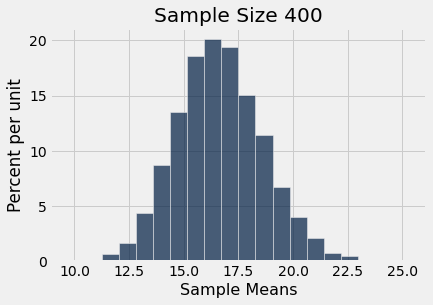

In [21]:
sample_size = 400
print("Sample size: ", sample_size)
print("Population mean:", delay_mean)
print("Average of sample means: ", np.mean(sample_means_400_10000))
print("Population SD:", delay_sd)
print("SD of sample means:", np.std(sample_means_400_10000))


sample_means_400_10000_table.hist(bins=20)
plots.xlabel('Sample Means')
plots.title('Sample Size ' + str(sample_size))

In [22]:
39.480199851609314/1.9658976091057616

20.082531088466954

Are we noticing a pattern here? What do we expect to get for population SD / SD of sample means for sample of size 900?

Sample size:  900
Population mean: 16.658155515370705
Average of sample means:  16.66205177777778
Population SD: 39.480199851609314
SD of sample means: 1.3131097405402863


Text(0.5, 1.0, 'Sample Size 900')

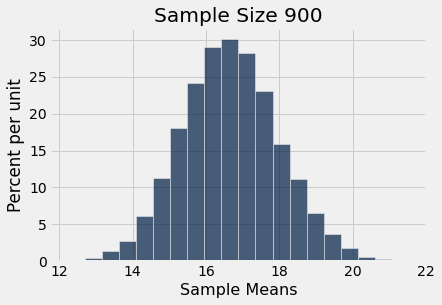

In [23]:
sample_size = 900
print("Sample size: ", sample_size)
print("Population mean:", delay_mean)
print("Average of sample means: ", np.mean(sample_means_900_10000))
print("Population SD:", delay_sd)
print("SD of sample means:", np.std(sample_means_900_10000))

Table().with_column(
    'Mean of 900 flight delays', sample_means_900_10000).hist(bins=20)
plots.xlabel('Sample Means')
plots.title('Sample Size ' + str(sample_size))

In [24]:
39.480199851609314/1.31015543758933

30.13398160164293

Let's make this a function

In [25]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size,num_simulations):
    sample_means = many_sample_means(sample_size,num_simulations)
    sample_means_table = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_table.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.600754
Population SD: 39.480199851609314
SD of sample means: 3.941864103629652


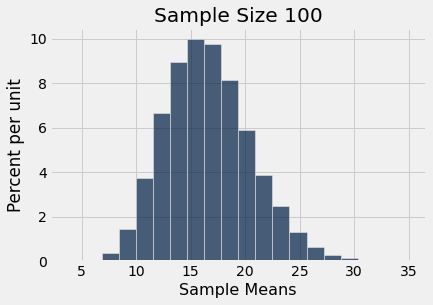

In [26]:
plot_and_summarize_sample_means(100,10000)

<h3>Now let's see the effect of increasing the number of trials&mdash;that is, the number of samples that we take&mdash;for a specified sample size (e.g., <tt>sample_size=400</tt>):</h3>

Slides: Variability of the sample mean

<h4>Sample Size=400<br>
Number of Trials=10</h4>

Population Average: 16.66
Sample Average: 15.69


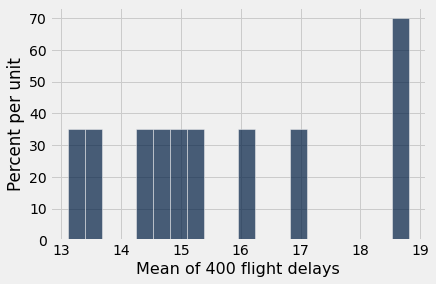

In [27]:
sample_means_400_10 = many_sample_means(400,10)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_10).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_10),2))

<h4>Sample Size=400<br>
Number of Trials=50</h4>

Population Average: 16.66
Sample Average: 16.92


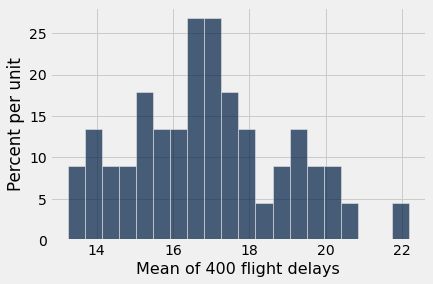

In [28]:
sample_means_400_50 = many_sample_means(400,50)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_50).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_50),2))

<h4>Sample Size=400<br>
Number of Trials=100</h4>

Population Average: 16.66
Sample Average: 16.42


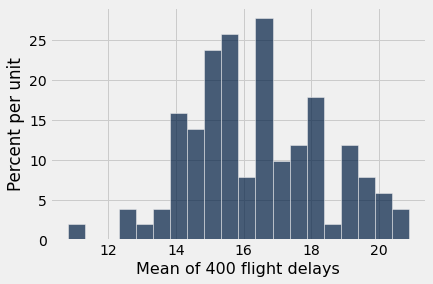

In [29]:
sample_means_400_100 = many_sample_means(400,100)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_100).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_100),2))

<h4>Sample Size=400<br>
Number of Trials=1,000</h4>

Population Average: 16.66
Sample Average: 16.71


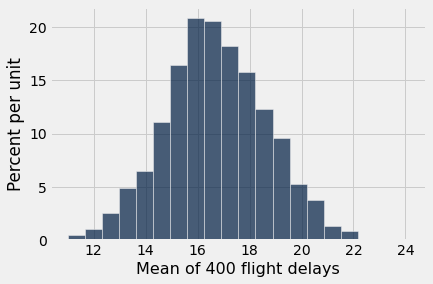

In [30]:
sample_means_400_1000 = many_sample_means(400,1000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_1000).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_1000),2))

<h4>Sample Size=400<br>
Number of Trials=10,000</h4>

Population Average: 16.66
Sample Average: 16.63


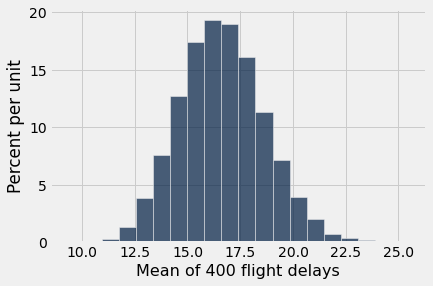

In [31]:
sample_means_400_10000 = many_sample_means(400,10000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_10000).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_10000),2))

<h4>Sample Size=400<br>
Number of Trials=50,000</h4>

Population Average: 16.66
Sample Average: 16.66


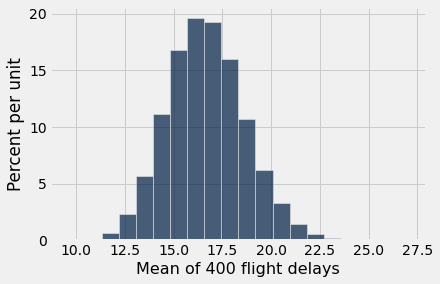

In [32]:
sample_means_400_50000 = many_sample_means(400,50000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400_50000).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))
print('Sample Average:', np.round(np.mean(sample_means_400_50000),2))

<h1> Lecture 24B

Data Science 8, Summer 2021 </h1>

In [33]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

## SD of 0/1 Distribution ##

<h4>Play with the <tt>number_of_ones</tt> in the cell below&mdash;by trying integers between 0 and 100&mdash;and see how it affects the variance and standard deviation.<br><br>

Compare Variance and SD values for 0 and 100, 1 and 9, 2 and 8, ...</h4>

In [34]:
# Population of size 10

number_of_ones = 50
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(100 - number_of_ones))

print('Variance:', np.round(np.var(zero_one_population),4))
print('Standard Deviation:', np.round(np.std(zero_one_population),4))

zero_one_population

Variance: 0.25
Standard Deviation: 0.5


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<h4> Let's make a graph with proportion of ones on the $x$-axis and SD on the $y$-axis:</h4>

<h5>Step 1: Define a function that does two things: <br>
<ul>
<li> Create an array of size 100, consisting of a specified number of ones, and each of the remaining elements equal to zero; and </li><br>
<li> Return the Standard Deviation of the values in the array.
</ul>   
</h5> 

In [35]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (100 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(100 - number_of_ones))
    return np.std(zero_one_population)

<h5>Step 2: Create a table of two columns, where<br>
<ul>
<li> the first column contains the array of ones and zeros constructed above; and</li><br>
<li> the second column denotes the fraction (proportion) of ones in the array.</li>
</ul>
</h5>

In [36]:
possible_ones = np.arange(101)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 100
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.01
2,0.02
3,0.03
4,0.04
5,0.05
6,0.06
7,0.07
8,0.08
9,0.09


<h5>Step 3: Add a column of Standard Deviations computed from the second column of the table above:</h5>

In [37]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,SD
0,0,0
1,0.01,0.0994987
2,0.02,0.14
3,0.03,0.170587
4,0.04,0.195959
5,0.05,0.217945
6,0.06,0.237487
7,0.07,0.255147
8,0.08,0.271293
9,0.09,0.286182


<h4>Question: What are your observations of the SD as a function of the Proportion of Ones?</h4>

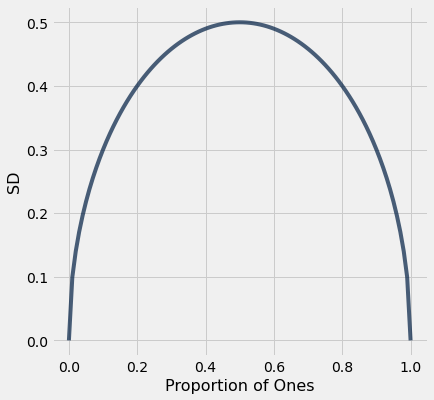

In [38]:
zero_one_pop.plot('Proportion of Ones', 'SD')

In [39]:
## Slides